In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/NLP2021/TextClassification

/content/gdrive/MyDrive/NLP2021/TextClassification


In [ ]:
#!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [ ]:
import pandas as pd
df = pd.read_csv('bbc_preprocessed.csv')
df.head()

,Unnamed: 0,category,text,category_id,clean_text
0,0,tech,tv future in the hands of viewers with home th...,0,tv futur hand viewer home theatr system plasma...
1,1,business,worldcom boss left books alone former worldc...,1,worldcom boss left book alon former worldcom b...
2,2,sport,tigers wary of farrell gamble leicester say ...,2,tiger wari farrel gambl leicest say rush make ...
3,3,sport,yeading face newcastle in fa cup premiership s...,2,yead face newcastl fa cup premiership side new...
4,4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelv raid box offic ocean twelv crime c...


In [ ]:
df.shape

(2225, 5)

In [ ]:
print(df.category_id.unique(),df.category.unique())

[0 1 2 3 4] ['tech' 'business' 'sport' 'entertainment' 'politics']


Vectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text']

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(texts) #features
y = df['category_id'].values #target

print (X.shape)
print(y.shape)

(2225, 19335)
(2225,)


training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, shuffle = True, stratify = y,random_state = 3)

https://scikit-learn.org/stable/modules/naive_bayes.html

MultinomialNB:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Evaluate the model

In [ ]:
predicted = mnb.predict(X_test)

In [ ]:
mnb.score(X_test,y_test)

0.9715568862275449

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion

array([[117,   1,   1,   0,   1],
       [  2, 150,   0,   0,   1],
       [  0,   0, 154,   0,   0],
       [  3,   3,   0, 106,   4],
       [  0,   2,   1,   0, 122]])

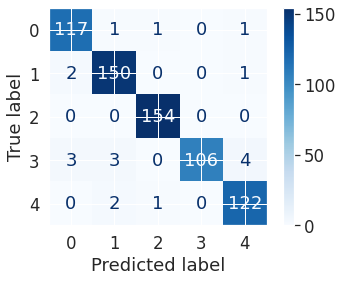

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


import seaborn as sn

sn.set(font_scale=1.5) # for label size

plot_confusion_matrix(mnb, X_test, y_test,cmap=plt.cm.Blues,values_format='1')
plt.show()

Checking with new instance

In [ ]:
%run preprocess.ipynb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_news = 'blair prepares to name poll date tony blair '
new_news = preprocess(new_news)
vec = tfidf_vectorizer.transform([new_news])
y_predict = mnb.predict(vec)

In [ ]:
classes = {0:'tech',1:'business',2:'sport',3:'entertainment',4:'politics'}
classes[y_predict[0]]

'politics'